# Local Linear Embeddings (LLEs)
Darius Muntean and Brett Storoe


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
import seaborn as sns

In [2]:
red_wine_data = pd.read_csv("winequality-red.csv", delimiter = ";")
white_wine_data = pd.read_csv("winequality-white.csv", delimiter = ";")

white_wine_data = white_wine_data.sample(n=len(red_wine_data), random_state=42).reset_index(drop=True)

In [3]:
red_wine_data.size

19188

In [4]:
red_wine_data["WineType"] = 0
white_wine_data["WineType"] = 1
wine_data = pd.concat([red_wine_data, white_wine_data])
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.7,0.34,0.31,16.4,0.051,20.0,146.0,0.99834,3.06,0.54,9.1,5,1
1595,9.3,0.31,0.49,1.3,0.042,34.0,147.0,0.99480,3.11,0.46,9.8,5,1
1596,6.4,0.17,0.27,6.7,0.036,88.0,223.0,0.99480,3.28,0.35,10.2,6,1
1597,7.5,0.29,0.36,15.7,0.050,29.0,124.0,0.99680,3.06,0.54,10.4,5,1


In [5]:
from sklearn.preprocessing import StandardScaler

wine_features = wine_data.drop(columns=["WineType"])

scaler = StandardScaler()
wine_features_normalized = scaler.fit_transform(wine_features)


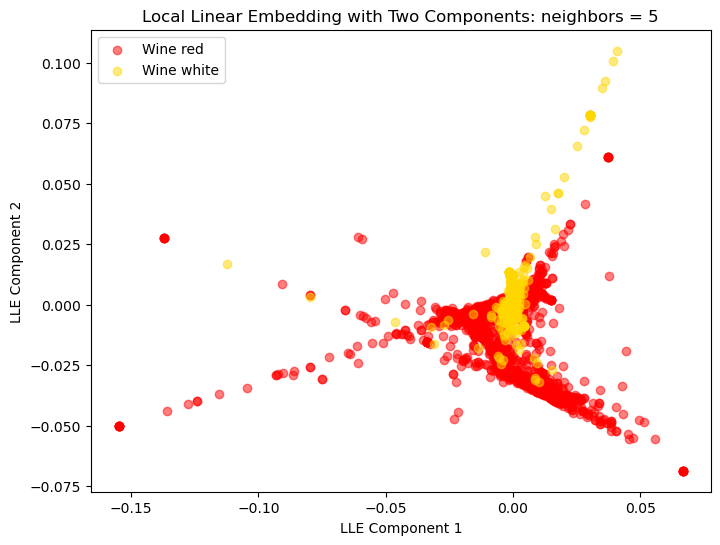

In [6]:
import matplotlib.pyplot as plt
embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
wine_data_transformed = embedding.fit_transform(wine_features_normalized)
# Boolean masks
reds = wine_data["WineType"] == 0
whites = wine_data["WineType"] == 1

plt.figure(figsize=(8, 6))

# Red wine
plt.scatter(
    wine_data_transformed[reds, 0],
    wine_data_transformed[reds, 1],
    color="red",
    alpha=0.5,
    label="Wine red",
)

# White wine
plt.scatter(
    wine_data_transformed[whites, 0],
    wine_data_transformed[whites, 1],
    color="gold",
    alpha=0.5,
    label="Wine white",
)

plt.xlabel("LLE Component 1")
plt.ylabel("LLE Component 2")
plt.title("Local Linear Embedding with Two Components: neighbors = 5")
plt.legend()
plt.show()

In [8]:
corr = pd.DataFrame(
    np.corrcoef(wine_features_normalized.T, wine_data_transformed.T)[:wine_features_normalized.shape[1], wine_features_normalized.shape[1]:],
    index=wine_features.columns,
    columns=[f"LLE_{i}" for i in range(wine_data_transformed.shape[1])]
)

print(corr)

                         LLE_0     LLE_1
fixed acidity        -0.246624 -0.212411
volatile acidity      0.082343 -0.492154
citric acid          -0.213913  0.250759
residual sugar        0.031137  0.254964
chlorides             0.010473 -0.099524
free sulfur dioxide   0.018287  0.356336
total sulfur dioxide -0.028423  0.394514
density              -0.123835 -0.269639
pH                    0.119269 -0.203964
sulphates            -0.098723 -0.084004
alcohol               0.007801  0.167845
quality              -0.103678  0.395538


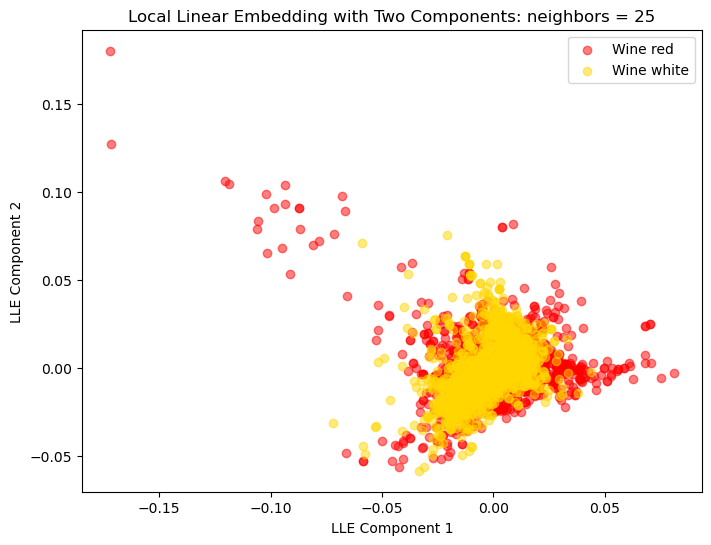

In [9]:
embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=25)
wine_data_transformed = embedding.fit_transform(wine_features_normalized)


# Boolean masks
reds = wine_data["WineType"] == 0
whites = wine_data["WineType"] == 1

plt.figure(figsize=(8, 6))

# Red wine
plt.scatter(
    wine_data_transformed[reds, 0],
    wine_data_transformed[reds, 1],
    color="red",
    alpha=0.5,
    label="Wine red",
)

# White wine
plt.scatter(
    wine_data_transformed[whites, 0],
    wine_data_transformed[whites, 1],
    color="gold",
    alpha=0.5,
    label="Wine white",
)

plt.xlabel("LLE Component 1")
plt.ylabel("LLE Component 2")
plt.title("Local Linear Embedding with Two Components: neighbors = 25")
plt.legend()
plt.show()

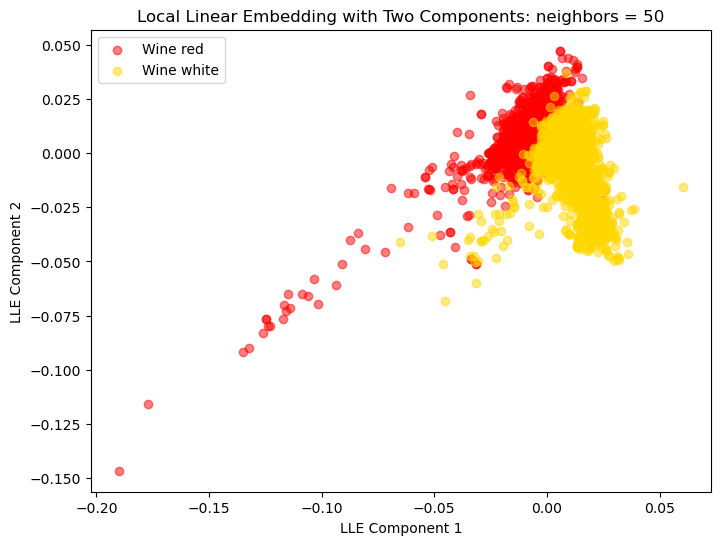

In [10]:
embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=50)
wine_data_transformed = embedding.fit_transform(wine_features_normalized)


# Boolean masks
reds = wine_data["WineType"] == 0
whites = wine_data["WineType"] == 1

plt.figure(figsize=(8, 6))

# Red wine
plt.scatter(
    wine_data_transformed[reds, 0],
    wine_data_transformed[reds, 1],
    color="red",
    alpha=0.5,
    label="Wine red",
)

# White wine
plt.scatter(
    wine_data_transformed[whites, 0],
    wine_data_transformed[whites, 1],
    color="gold",
    alpha=0.5,
    label="Wine white",
)

plt.xlabel("LLE Component 1")
plt.ylabel("LLE Component 2")
plt.title("Local Linear Embedding with Two Components: neighbors = 50")
plt.legend()
plt.show()

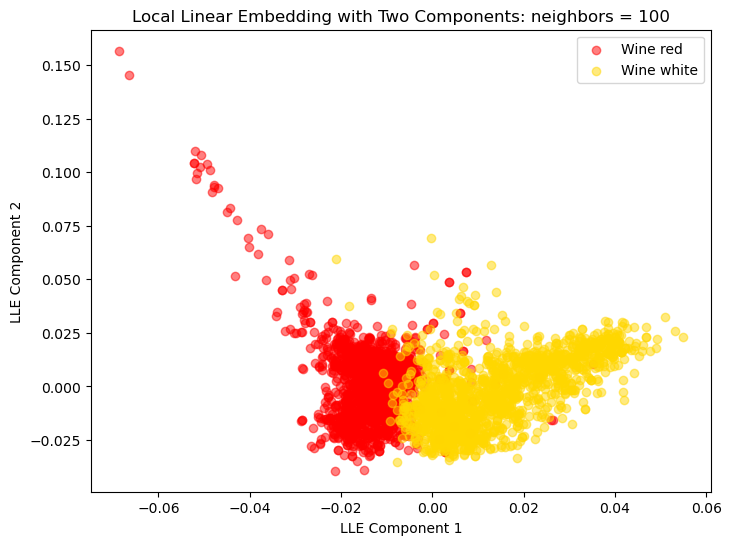

In [11]:
embedding = LocallyLinearEmbedding(n_components=2, n_neighbors=100)
wine_data_transformed = embedding.fit_transform(wine_features_normalized)


# Boolean masks
reds = wine_data["WineType"] == 0
whites = wine_data["WineType"] == 1

plt.figure(figsize=(8, 6))

# Red wine
plt.scatter(
    wine_data_transformed[reds, 0],
    wine_data_transformed[reds, 1],
    color="red",
    alpha=0.5,
    label="Wine red",
)

# White wine
plt.scatter(
    wine_data_transformed[whites, 0],
    wine_data_transformed[whites, 1],
    color="gold",
    alpha=0.5,
    label="Wine white",
)

plt.xlabel("LLE Component 1")
plt.ylabel("LLE Component 2")
plt.title("Local Linear Embedding with Two Components: neighbors = 100")
plt.legend()
plt.show()

In [12]:
corr = pd.DataFrame(
    np.corrcoef(wine_features_normalized.T, wine_data_transformed.T)[:wine_features_normalized.shape[1], wine_features_normalized.shape[1]:],
    index=wine_features.columns,
    columns=[f"LLE_{i}" for i in range(wine_data_transformed.shape[1])]
)

print(corr)

                         LLE_0     LLE_1
fixed acidity        -0.455333 -0.127259
volatile acidity     -0.580794  0.396233
citric acid           0.155183 -0.268706
residual sugar        0.806929  0.310094
chlorides            -0.539456  0.625673
free sulfur dioxide   0.701445  0.076783
total sulfur dioxide  0.811279  0.121323
density              -0.135257  0.501893
pH                   -0.312603 -0.012037
sulphates            -0.508121  0.118204
alcohol              -0.122162 -0.703450
quality               0.162337 -0.503349


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine_features_normalized, 
    wine_data["WineType"], 
    test_size=0.2, 
    random_state=42, 
    stratify=wine_data["WineType"]
)

embedding_split = LocallyLinearEmbedding(n_components=2, n_neighbors=100)
X_train_lle = embedding_split.fit_transform(X_train)
X_test_lle = embedding_split.transform(X_test)


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pipeline = Pipeline([
    ("lle", LocallyLinearEmbedding()),
    ("knn", KNeighborsClassifier())
])

param_grid = {
    "lle__n_components": np.arange(3, 13),
    "lle__n_neighbors": np.arange(1, 101, 2),
    "lle__reg": [0, 0.00001, 0.0001, 0.001, 0.01],
    "knn__n_neighbors": [5],   # you can also grid search this
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,             # cross-validation
    scoring="accuracy",
    n_jobs=-1,        # parallelism
)

grid.fit(X_train, y_train)

print("Best score:", grid.best_score_)
print("Best params:", grid.best_params_)


C:\Users\munteand\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1572 fits failed out of a total of 7500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\munteand\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\munteand\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\munteand\AppData\Local\anaconda3\Lib\site-pac

Best score: 0.9898361118908318
Best params: {'knn__n_neighbors': 5, 'lle__n_components': np.int64(6), 'lle__n_neighbors': np.int64(39), 'lle__reg': 0.01}


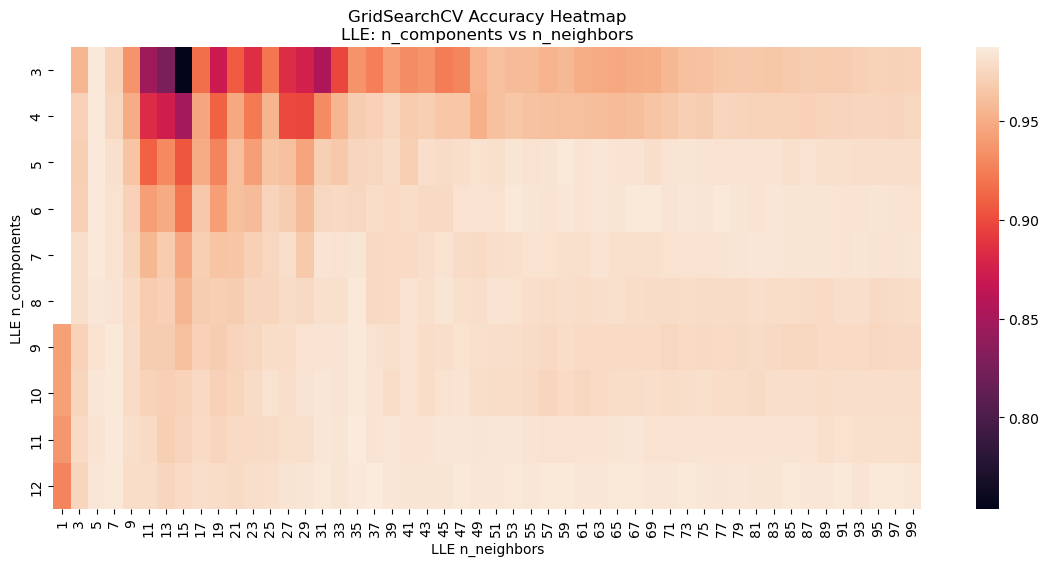

In [16]:
reg_value = 0.001   # choose which reg you want

df = pd.DataFrame(grid.cv_results_)
df = df[df['param_lle__reg'] == reg_value]

heatmap_data = df.pivot(
    index='param_lle__n_components',
    columns='param_lle__n_neighbors',
    values='mean_test_score'
)


plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
)
plt.title("GridSearchCV Accuracy Heatmap\nLLE: n_components vs n_neighbors")
plt.ylabel("LLE n_components")
plt.xlabel("LLE n_neighbors")
plt.show()


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lle, y_train)

y_pred = knn.predict(X_test_lle)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on test set: 0.9484375

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       320
           1       0.94      0.96      0.95       320

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.95      0.95      0.95       640

Confusion Matrix:
 [[300  20]
 [ 13 307]]
